# Genetic algorithms

## Product class

In [989]:
class Product():
  def __init__(self, name, space, price):
    self.name = name
    self.space = space
    self.price = price

In [990]:
p1 = Product('Refrigerator A', 0.751, 999.9)

In [991]:
p1.name, p1.space, p1.price

('Refrigerator A', 0.751, 999.9)

In [992]:
p2 = Product('Cell phone', 0.00000899, 2199.12)

In [993]:
p2.name, p2.space, p2.price

('Cell phone', 8.99e-06, 2199.12)

In [994]:
products_list = []
products_list.append(Product('Refrigerator A', 0.751, 999.90))
products_list.append(Product('Cell phone', 0.00000899, 2199.12))
products_list.append(Product('TV 55', 0.400, 4346.99))
products_list.append(Product("TV 50' ", 0.290, 3999.90))
products_list.append(Product("TV 42' ", 0.200, 2999.00))
products_list.append(Product("Notebook A", 0.00350, 2499.90))
products_list.append(Product("Ventilator", 0.496, 199.90))
products_list.append(Product("Microwave A", 0.0424, 308.66))
products_list.append(Product("Microwave B", 0.0544, 429.90))
products_list.append(Product("Microwave C", 0.0319, 299.29))
products_list.append(Product("Refrigerator B", 0.635, 849.00))
products_list.append(Product("Refrigerator C", 0.870, 1199.89))
products_list.append(Product("Notebook B", 0.498, 1999.90))
products_list.append(Product("Notebook C", 0.527, 3999.00))

In [995]:
for product in products_list:
  print(product.name, ' - ', product.price, ' - ', product.space)

Refrigerator A  -  999.9  -  0.751
Cell phone  -  2199.12  -  8.99e-06
TV 55  -  4346.99  -  0.4
TV 50'   -  3999.9  -  0.29
TV 42'   -  2999.0  -  0.2
Notebook A  -  2499.9  -  0.0035
Ventilator  -  199.9  -  0.496
Microwave A  -  308.66  -  0.0424
Microwave B  -  429.9  -  0.0544
Microwave C  -  299.29  -  0.0319
Refrigerator B  -  849.0  -  0.635
Refrigerator C  -  1199.89  -  0.87
Notebook B  -  1999.9  -  0.498
Notebook C  -  3999.0  -  0.527


## Individual Class

In [996]:
from random import random

In [997]:
random()

0.91836225884411

In [998]:
class Individual():
    def __init__(self, spaces, prices, space_limit, generation=0):
        self.spaces = spaces
        self.prices = prices
        self.space_limit = space_limit
        self.generation = generation
        self.Chromosome = []

        self.score_evaluation = 0
        self.used_space = 0

        for i in range(len(spaces)):
            if random() < 0.5:
                self.Chromosome.append('0')
            else:
                self.Chromosome.append('1')

    def fitness(self):
        score = 0
        sum_spaces = 0
        for i in range(len(self.Chromosome)):
            if self.Chromosome[i] == '1':
                score += self.prices[i]
                sum_spaces += self.spaces[i]
        if sum_spaces > self.space_limit:
            score = 1

        self.score_evaluation = score
        self.used_space = sum_spaces

    def crossover(self, other_individual):
        cutoff = round(random() * len(self.Chromosome))
        #print(cutoff)

        child1 = other_individual.Chromosome[0:cutoff] + self.Chromosome[cutoff::]
        child2 = self.Chromosome[0:cutoff] + other_individual.Chromosome[cutoff::]

        #print(child1)
        #print(child2)

        children = [Individual(self.spaces, self.prices, self.space_limit, self.generation + 1),
                    Individual(self.spaces, self.prices, self.space_limit, self.generation + 1)]
        children[0].Chromosome = child1
        children[1].Chromosome = child2

        return children

    def mutation(self, rate):
        #print('Before: ', self.Chromosome)
        for i in range(len(self.Chromosome)):
            if random() < rate:
                if self.Chromosome[i] == '1':
                    self.Chromosome[i] = '0'
                else:
                    self.Chromosome[i] = '1'
        #print('After: ', self.Chromosome)
        return self


In [999]:
spaces = []
prices = []
names = []

for product in products_list:
    spaces.append(product.space)
    prices.append(product.price)
    names.append(product.name)
limit = 3

print(spaces)
print(prices)
print(names)

[0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]
[999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0]
['Refrigerator A', 'Cell phone', 'TV 55', "TV 50' ", "TV 42' ", 'Notebook A', 'Ventilator', 'Microwave A', 'Microwave B', 'Microwave C', 'Refrigerator B', 'Refrigerator C', 'Notebook B', 'Notebook C']


In [1000]:
individual1 = Individual(spaces, prices, limit)
individual1.fitness()

print('Score: ', individual1.score_evaluation)
print('Used space: ',individual1.used_space)
print('Chromosome: ',individual1.Chromosome)

Score:  17245.6
Used space:  2.8125089900000004
Chromosome:  ['1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0']


In [1001]:
individual2 = Individual(spaces, prices, limit)
individual2.fitness()

print('Score: ', individual2.score_evaluation)
print('Used space: ',individual2.used_space)
print('Chromosome: ',individual2.Chromosome)

Score:  15653.64
Used space:  1.7908
Chromosome:  ['0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1']


In [1002]:
children = individual1.crossover(individual2)
children[0].fitness()
print(children[0].score_evaluation)
print(children[0].Chromosome)
children[1].fitness()
print(children[1].score_evaluation)
print(children[1].Chromosome)

14854.429999999998
['0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0']
18044.809999999998
['1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1']


In [1003]:
individual1.mutation(0.5)

In [1004]:

class GeneticAlgorithm():
    def __init__(self, population_size):
        self.population_size = population_size
        self.population = []
        self.generation = 0
        self.best_solution = None
        self.list_of_solutions = []

    def initialize_population(self, spaces, prices, space_limit):
        for i in range(self.population_size):
            self.population.append(Individual(spaces, prices, space_limit))
        self.best_solution = self.population[0]

    def order_population(self):
        self.population = sorted(self.population, key=lambda population: population.score_evaluation, reverse=True)

    def best_individual(self, individual):
        if individual.score_evaluation > self.best_solution.score_evaluation:
            self.best_solution = individual

    def sum_evaluations(self):
        sum = 0

        for individual in self.population:
            sum += individual.score_evaluation
        return sum

    def select_parents(self, sum_evaluation):
        parent = -1
        random_value = random() * sum_evaluation

        sum = 0
        i = 0
        while i < len(self.population) and sum < random_value:
            sum += self.population[i].score_evaluation
            parent += 1
            i += 1
        return parent

    def visualize_generation(self):
        best = self.population[0]
        print('Generation: ', best.generation,
              'Space: ', best.used_space,
              'Total price: ', best.score_evaluation,
              'Chromosome: ', best.Chromosome
              )

    def solve(self, mutation_probability, number_of_generations, spaces, prices, limit):
        self.initialize_population(spaces, prices, limit)
        for individual in self.population:
            individual.fitness()
        self.order_population()
        self.best_solution = self.population[0]
        self.list_of_solutions.append(self.best_solution)

        self.visualize_generation()
        for generation in range(number_of_generations):
            sum = self.sum_evaluations()
            new_population = []
            for new_individuals in range(0, self.population_size, 2):
                parent1 = self.select_parents(sum)
                parent2 = self.select_parents(sum)

                children = self.population[parent1].crossover(self.population[parent2])
                new_population.append(children[0].mutation(mutation_probability))
                new_population.append(children[1].mutation(mutation_probability))

            self.population = list(new_population)

            for individual in self.population:
                individual.fitness()
            self.order_population()
            best = self.population[0]
            self.list_of_solutions.append(best)
            self.best_individual(best)
            self.visualize_generation()

        print('Generation: ', self.best_solution.generation,
                'Space: ', self.best_solution.used_space,
                'Total price: ', self.best_solution.score_evaluation,
                'Chromosome: ', self.best_solution.Chromosome
                )
        return self.best_solution


In [1005]:
population_size = 20
ga = GeneticAlgorithm(population_size)
ga.initialize_population(spaces, prices, limit)

for individual in ga.population:
    individual.fitness()

ga.order_population()

for individual in ga.population:
    print(individual.Chromosome)
    print(individual.score_evaluation)

['0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0']
19282.560000000005
['0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1']
18896.71
['1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1']
18344.69
['0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1']
18124.589999999997
['1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1']
16774.69
['0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1']
15825.9
['1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1']
14974.589999999998
['0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1']
13054.76
['1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0']
11854.77
['0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1']
11806.46
['1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0']
9327.72
['1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0']
8928.78
['0', '0', '1

In [1006]:
ga.best_individual(ga.population[0])
ga.best_solution.score_evaluation

19282.560000000005

In [1007]:
sum = ga.sum_evaluations()
print(sum)

198722.37999999995


In [1008]:
parent1 = ga.select_parents(sum)
print(parent1)

parent2 = ga.select_parents(sum)
print(parent2)


0
8


In [1009]:
new_population = []
mutation_probability = 0.01
for new_individuals in range(0 ,ga.population_size, 2):
    # print(new_individuals)
    parent1 = ga.select_parents(sum)
    parent2 = ga.select_parents(sum)
    #print(parent1, parent2)
    children = ga.population[parent1].crossover(ga.population[parent2])
    #print(children[0].Chromosome)
    #print(children[1].Chromosome)

    new_population.append(children[0].mutation(mutation_probability))
    new_population.append(children[1].mutation(mutation_probability))

## Putting all together

In [1010]:
products_list = []
products_list.append(Product('Refrigerator A', 0.751, 999.90))
products_list.append(Product('Cell phone', 0.00000899, 2199.12))
products_list.append(Product('TV 55', 0.400, 4346.99))
products_list.append(Product("TV 50' ", 0.290, 3999.90))
products_list.append(Product("TV 42' ", 0.200, 2999.00))
products_list.append(Product("Notebook A", 0.00350, 2499.90))
products_list.append(Product("Ventilator", 0.496, 199.90))
products_list.append(Product("Microwave A", 0.0424, 308.66))
products_list.append(Product("Microwave B", 0.0544, 429.90))
products_list.append(Product("Microwave C", 0.0319, 299.29))
products_list.append(Product("Refrigerator B", 0.635, 849.00))
products_list.append(Product("Refrigerator C", 0.870, 1199.89))
products_list.append(Product("Notebook B", 0.498, 1999.90))
products_list.append(Product("Notebook C", 0.527, 3999.00))


spaces = []
prices = []
names = []

for product in products_list:
    spaces.append(product.space)
    prices.append(product.price)
    names.append(product.name)
limit = 3

print(spaces)
print(prices)
print(names)

limit = 3
population_size = 20
mutation_probability = 0.01
number_of_generations = 100

ga = GeneticAlgorithm(population_size)
result = ga.solve(mutation_probability, number_of_generations, spaces, prices, limit)
print(result)

[0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]
[999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0]
['Refrigerator A', 'Cell phone', 'TV 55', "TV 50' ", "TV 42' ", 'Notebook A', 'Ventilator', 'Microwave A', 'Microwave B', 'Microwave C', 'Refrigerator B', 'Refrigerator C', 'Notebook B', 'Notebook C']
Generation:  0 Space:  2.2168 Total price:  17453.54 Chromosome:  ['1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0']
Generation:  1 Space:  2.4689 Total price:  20474.489999999998 Chromosome:  ['0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1']
Generation:  2 Space:  2.4689 Total price:  20474.489999999998 Chromosome:  ['0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1']
Generation:  3 Space:  2.0471999999999997 Total price:  20882.54 Chromosome:  ['0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1']
Generat

In [1011]:
for value in ga.list_of_solutions:
    print(value)

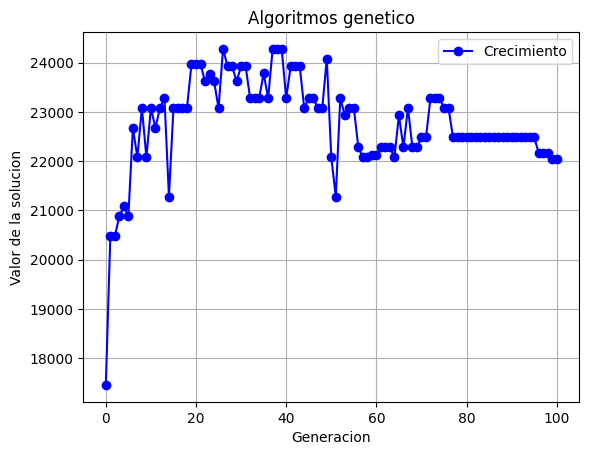

In [1012]:
import matplotlib.pyplot as plt

generations= []
solutions = []

for value in ga.list_of_solutions:
    generations.append(value.generation)
    solutions.append(value.score_evaluation)

plt.plot(generations, solutions, marker='o', linestyle='-', color='b', label='Crecimiento')
plt.xlabel('Generacion')
plt.ylabel('Valor de la solucion')
plt.title('Algoritmos genetico')
plt.legend()
plt.grid(True)
plt.show()
